# Prediccion de riesgo accidente cerebrovascular

In [21]:
import pandas as pd
import seaborn as sns


### Detalle de columnas

1) id: identificador único
2) gender: "Masculino", "Femenino" u "Otro"
3) age: edad del paciente
4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
5) heart_disease: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
6) ever_married: "No" o "Sí"
7) work_type: "niños", "Govt_jov", "Never_worked", "Private" o "Self-employment"
8) Residence_type: "Rural" o "Urban"
9) avg_glucose_level: nivel promedio de glucosa en sangre
10) bmi: índice de masa corporal
11) smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*
12) stroke: 1 si el paciente tuvo un stroke o 0 en caso contrario
*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente



In [22]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [23]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
data.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.dropna(inplace=True)

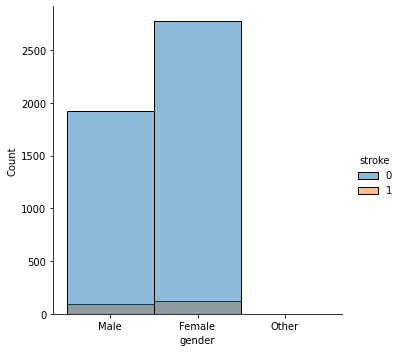

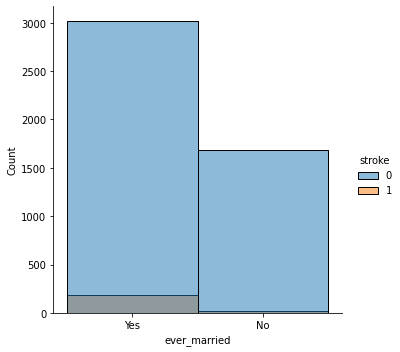

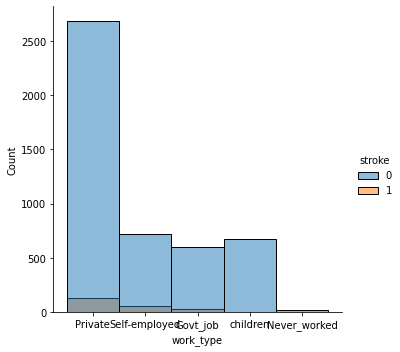

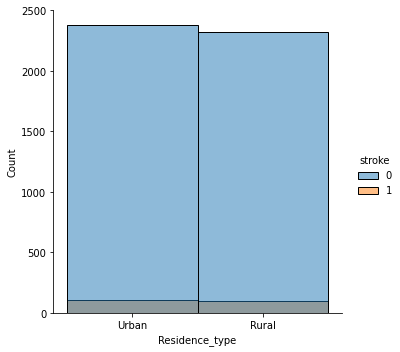

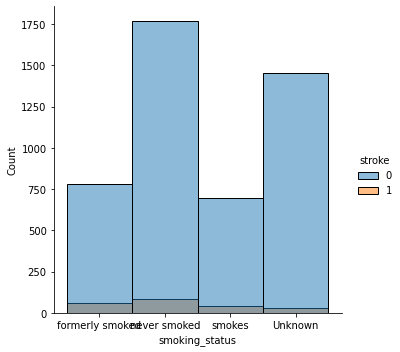

In [6]:
sns.displot( data= data,x =  "gender" , hue="stroke")
sns.displot( data= data,x =  "ever_married" , hue="stroke")
sns.displot( data= data,x =  "work_type" , hue="stroke")
sns.displot( data= data,x =  "Residence_type" , hue="stroke")
sns.displot( data= data,x =  "smoking_status" , hue="stroke")

In [7]:
# Delete single data with gender 'other'
data.drop(data[data.gender == 'Other'].index, inplace = True)

In [8]:
#Columnas cualitativas
print( "gender:", data['gender'].unique())
print( "ever_married:", data['ever_married'].unique())
print( "work_type:", data['work_type'].unique())
print( "Residence_type:", data['Residence_type'].unique())
print( "smoking_status:", data['smoking_status'].unique())


gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
data['gender'].replace(['Male', 'Female'], [0,1],inplace=True)
data['ever_married'].replace(['Yes', 'No'], [1,0],inplace=True)
data['work_type'].replace(['Private', 'Self-employed' ,'Govt_job' ,'children', 'Never_worked'], [1,2 ,3,4, 5],inplace=True)
data['Residence_type'].replace(['Urban' ,'Rural'], [0,1],inplace=True)
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [1,2 ,3 ,4 ],inplace=True)

In [10]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,0,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,1,1,105.92,32.5,2,1
3,60182,1,49.0,0,0,1,1,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,2,1,174.12,24.0,2,1
5,56669,0,81.0,0,0,1,1,0,186.21,29.0,1,1
6,53882,0,74.0,1,1,1,1,1,70.09,27.4,2,1
7,10434,1,69.0,0,0,0,1,0,94.39,22.8,2,1
9,60491,1,78.0,0,0,1,1,0,58.57,24.2,4,1
10,12109,1,81.0,1,0,1,1,1,80.43,29.7,2,1
11,12095,1,61.0,0,1,1,3,1,120.46,36.8,3,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int64  
 6   work_type          4908 non-null   int64  
 7   Residence_type     4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.5 KB


In [12]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000
mean,37060.423594,0.590261,42.868810,0.091891,0.049511,0.652812,1.842706,0.492665,105.297402,28.89456,2.584148,0.042584
std,20995.468407,0.491836,22.556128,0.288901,0.216954,0.476125,1.124107,0.499997,44.425550,7.85432,1.090022,0.201937
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.30000,1.000000,0.000000
25%,18602.500000,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.067500,23.50000,2.000000,0.000000
50%,37580.500000,1.000000,44.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.680000,28.10000,2.000000,0.000000
75%,55181.750000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.495000,33.10000,4.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.60000,4.000000,1.000000


Age con valores decimales.


In [13]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data.duplicated().sum()

0

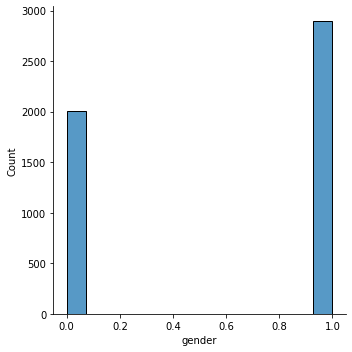

In [15]:
sns.displot(data["gender"], kde=False)

In [16]:
import seaborn as sns
df = data.drop('id', 1)

/tmp/ipykernel_10628/4055397840.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop('id', 1)
